Loading YOLOv5 model...


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 123.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 104.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 5.0s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-9-10 Python-3.10.12 torch-2.4.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 330MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Model loaded successfully!
Please enter the path or URL of the image (or type 'quit' to exit): /content/dog.jpg


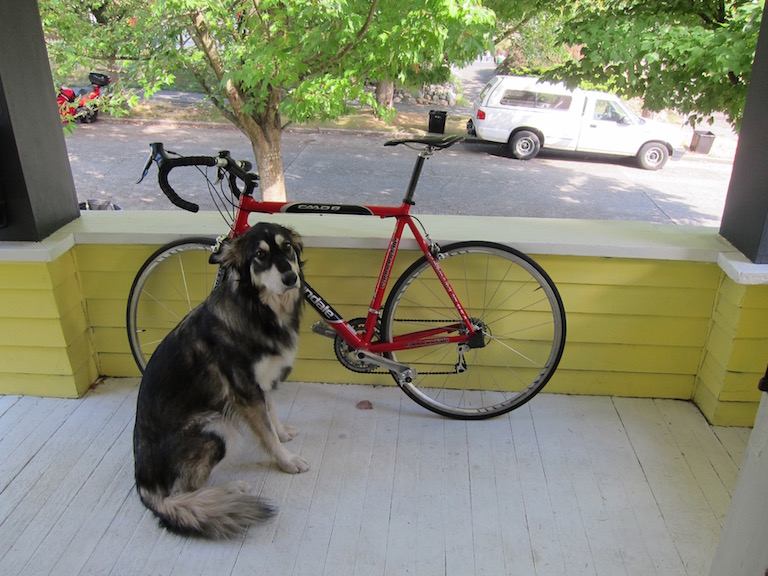

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


         xmin        ymin        xmax        ymax  confidence  class     name
0  133.724731  217.123474  308.856903  544.165894    0.892869     16      dog
1  471.127960   75.324112  687.931946  172.756271    0.759232      2      car
2  150.788635  118.135094  568.474426  426.075012    0.485510      1  bicycle


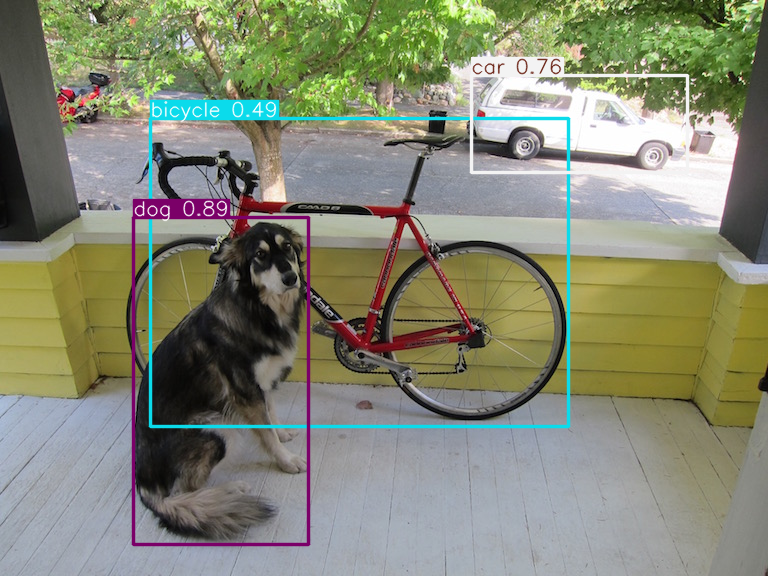

Label: dog
Confidence: 0.8928689360618591
Bounding Box: [133.7247314453125 217.12347412109375 308.8569030761719 544.1658935546875]
Please enter the path or URL of the image (or type 'quit' to exit): /content/dog2.jpg


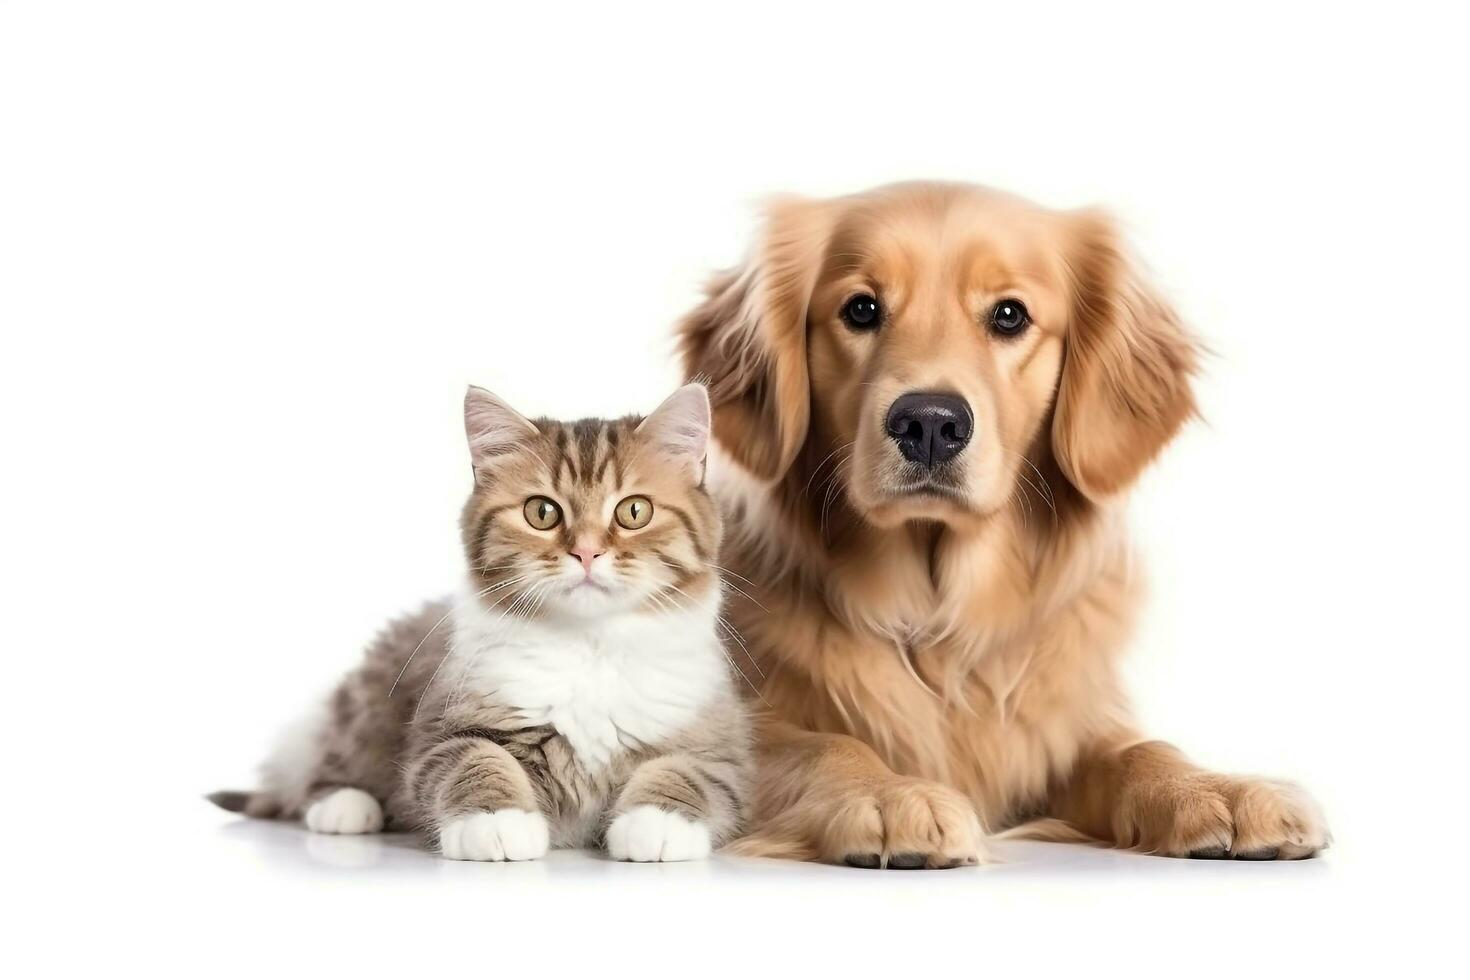

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


         xmin        ymin         xmax        ymax  confidence  class name
0  225.397812  375.911621   738.340332  866.262756    0.872643     15  cat
1  671.579529  182.893570  1328.334717  873.441040    0.864612     16  dog


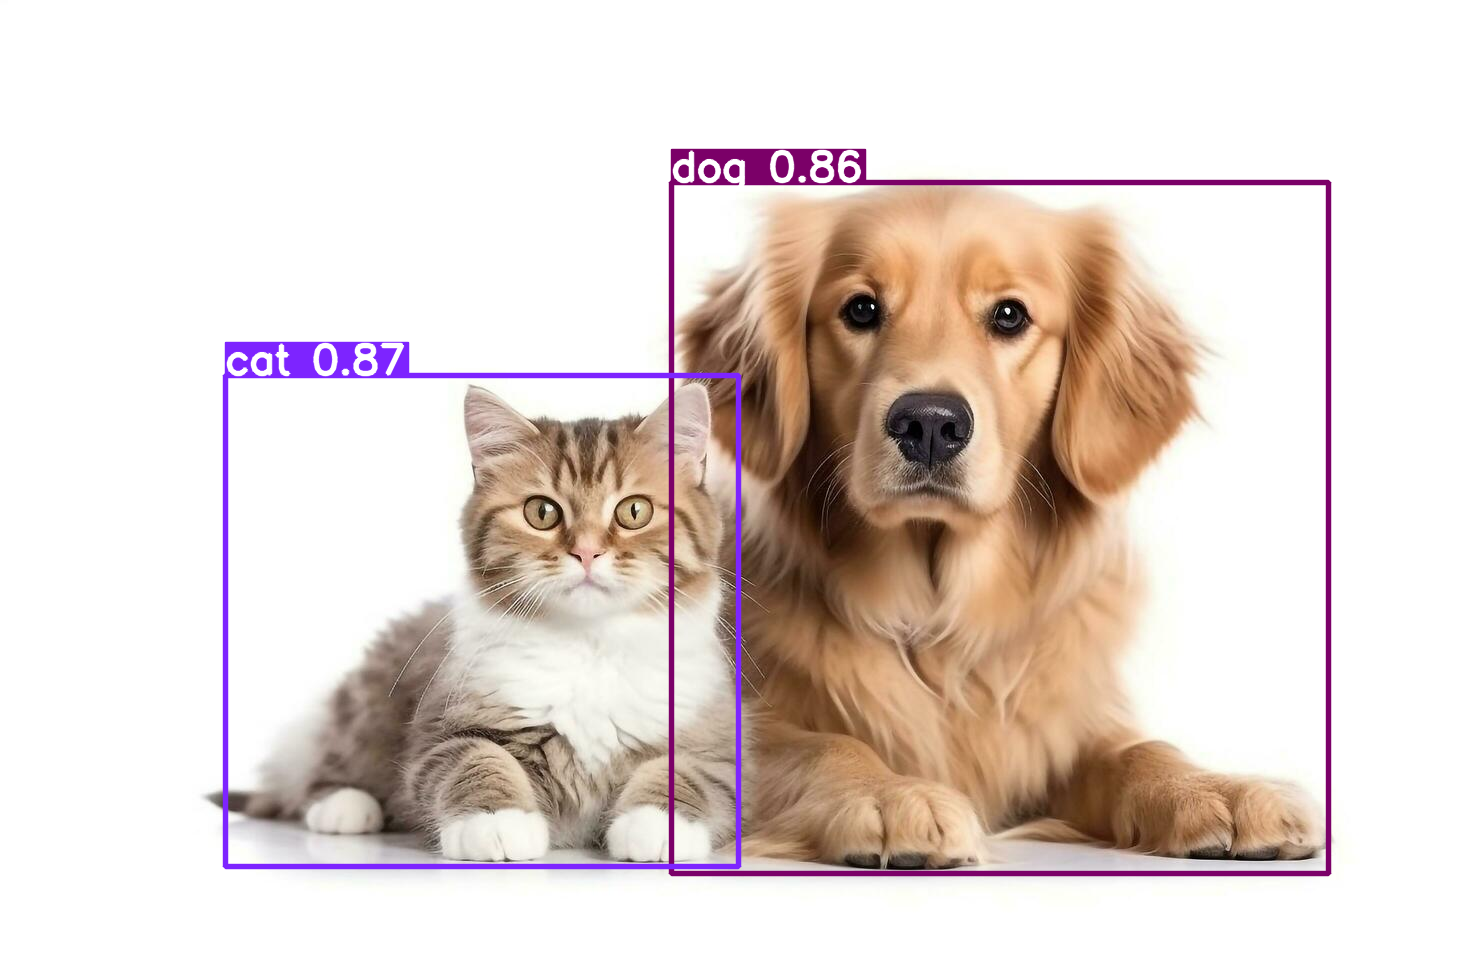

Label: cat
Confidence: 0.8726433515548706
Bounding Box: [225.39781188964844 375.91162109375 738.34033203125 866.2627563476562]
Please enter the path or URL of the image (or type 'quit' to exit): /content/bicycle1.jpeg


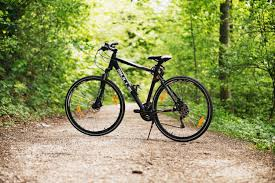

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


        xmin       ymin        xmax        ymax  confidence  class     name
0  69.220589  41.661903  211.620743  142.496353    0.934911      1  bicycle


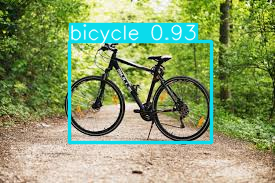

Label: bicycle
Confidence: 0.9349108934402466
Bounding Box: [69.22058868408203 41.661903381347656 211.62074279785156 142.49635314941406]
Please enter the path or URL of the image (or type 'quit' to exit): quit
Exiting...


In [ ]:
import torch
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow  # Import Colab-compatible image display function

# Load the pre-trained YOLOv5 model
print("Loading YOLOv5 model...")
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Set model to evaluation mode
model.eval()

print("Model loaded successfully!")

# Function to load image from file or URL
def load_image(source):
    # If the source is a URL, load the image from the web
    if source.startswith('http://') or source.startswith('https://'):
        response = requests.get(source)
        img_pil = Image.open(BytesIO(response.content))
        img_rgb = np.array(img_pil)  # Convert to NumPy array
    else:
        # If source is a file path, load the image from local file
        img = cv2.imread(source)
        if img is None:
            raise FileNotFoundError(f"Image at path {source} not found.")
        # Convert the image to RGB (YOLOv5 expects RGB format)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img_rgb

# Function to display image using Colab-compatible method
def display_image(img_rgb, window_name='Image'):
    # Convert RGB to BGR for OpenCV
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
    cv2_imshow(img_bgr)
    cv2.waitKey(0)  # Wait for a key press to close the window (not needed in Colab, but kept for consistency)
    cv2.destroyAllWindows()

# Loop to keep asking for image input
while True:
    # Ask for input image after model training
    image_source = input("Please enter the path or URL of the image (or type 'quit' to exit): ")

    # Exit the loop if the user types 'quit'
    if image_source.lower() == 'quit':
        print("Exiting...")
        break

    # Load the image
    try:
        img_rgb = load_image(image_source)

        # Display the image
        display_image(img_rgb)

        # Perform inference
        results = model(img_rgb)

        # Print detected objects (bounding boxes, labels, and confidence)
        print(results.pandas().xyxy[0])

        # Plot detections on image
        results_img = results.render()[0]
        display_image(results_img)

        # Example: Access the first detection
        if not results.pandas().xyxy[0].empty:
            detection = results.pandas().xyxy[0].iloc[0]  # First detected object
            print(f"Label: {detection['name']}")
            print(f"Confidence: {detection['confidence']}")
            print(f"Bounding Box: {detection[['xmin', 'ymin', 'xmax', 'ymax']].values}")
        else:
            print("No objects detected.")
    except Exception as e:
        print(f"Error: {e}")
